In [1]:
import collections
import qiskit
import qiskit_aer
import time

import numpy
import pandas

from matplotlib import pyplot as plt
%matplotlib inline

/tmp/ipykernel_51053/824455318.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


## Quantum Circut (1)

In [2]:
def get_circuit1():
    """Create the first circuit."""
    qreg_q = qiskit.QuantumRegister(5, 'q')
    creg_c = qiskit.ClassicalRegister(5, 'c')
    circuit = qiskit.QuantumCircuit(qreg_q, creg_c)

    circuit.h(qreg_q[1])
    circuit.h(qreg_q[4])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[0])
    circuit.ccx(qreg_q[1], qreg_q[3], qreg_q[4])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[4])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[4])

    return circuit

In [3]:
# Visualise
circ1 = get_circuit1()
circ1.draw(style='iqp')

┌───┐                    
q_0: ┤ H ├────────────■───────
     ├───┤     ┌───┐  │       
q_1: ┤ H ├──■──┤ H ├──■───────
     ├───┤  │  └───┘┌─┴─┐     
q_2: ┤ H ├──┼───────┤ X ├──■──
     └───┘  │       └───┘  │  
q_3: ───────■──────────────■──
     ┌───┐┌─┴─┐┌───┐     ┌─┴─┐
q_4: ┤ H ├┤ X ├┤ H ├─────┤ X ├
     └───┘└───┘└───┘     └───┘
c: 5/═════════════════════════

## Quantum Circuit (2)

In [4]:
def get_circuit2():
    """Create the first circuit."""
    qreg_q = qiskit.QuantumRegister(5, 'q')
    creg_c = qiskit.ClassicalRegister(5, 'c')
    circuit = qiskit.QuantumCircuit(qreg_q, creg_c)
    pi = numpy.pi
    
    circuit.rccx(qreg_q[0], qreg_q[1], qreg_q[2])
    circuit.tdg(qreg_q[4])
    circuit.sx(qreg_q[4])
    circuit.ccx(qreg_q[3], qreg_q[1], qreg_q[0])
    circuit.sx(qreg_q[2])
    circuit.h(qreg_q[0])
    circuit.swap(qreg_q[3], qreg_q[4])
    circuit.sdg(qreg_q[1])
    circuit.t(qreg_q[2])
    circuit.tdg(qreg_q[0])
    circuit.u(pi / 2, pi / 2, pi / 2, qreg_q[1])
    circuit.u(pi / 2, pi / 2, pi / 2, qreg_q[3])
    circuit.rxx(2.31, qreg_q[2], qreg_q[4])
    circuit.u(pi / 2, pi / 2, pi / 2, qreg_q[0])
    circuit.cx(qreg_q[4], qreg_q[0])

    return circuit

In [5]:
# Visualise
circ2 = get_circuit2()
circ2.draw(style='iqp')

┌───────┐┌───┐  ┌───┐      ┌─────┐      ┌────────────────┐┌───┐
q_0: ┤0      ├┤ X ├──┤ H ├──────┤ Tdg ├──────┤ U(π/2,π/2,π/2) ├┤ X ├
     │       │└─┬─┘ ┌┴───┴┐┌────┴─────┴─────┐└────────────────┘└─┬─┘
q_1: ┤1 Rccx ├──■───┤ Sdg ├┤ U(π/2,π/2,π/2) ├────────────────────┼──
     │       │  │   └┬────┤└─────┬───┬──────┘  ┌────────────┐    │  
q_2: ┤2      ├──┼────┤ √X ├──────┤ T ├─────────┤0           ├────┼──
     └───────┘  │    └────┘┌─────┴───┴──────┐  │            │    │  
q_3: ───────────■──────X───┤ U(π/2,π/2,π/2) ├──┤  Rxx(2.31) ├────┼──
      ┌─────┐ ┌────┐   │   └────────────────┘  │            │    │  
q_4: ─┤ Tdg ├─┤ √X ├───X───────────────────────┤1           ├────■──
      └─────┘ └────┘                           └────────────┘       
c: 5/═══════════════════════════════════════════════════════════════

## Measurements

In [6]:
def measure(circuit, shots=1, base='zzz'):
    """Make measurements."""
    circ = circuit.copy()

    # add rotations to measure in a given base
    for i, b in enumerate(base):
        if b == 'y':
            circ.sdg(i)
            circ.h(i)
        elif b == 'x':
            circ.h(i)
        elif b == 'z':
            pass
        else:
            raise KeyError

    # map the quantum measurement to the classical bits
    circ.barrier(range(5))
    circ.measure(range(5), range(5))

    # Use Aer's qasm_simulator
    backend_sim = qiskit_aer.Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator.
    job_sim = backend_sim.run(qiskit.transpile(circ, backend_sim), shots=shots)

    counts = job_sim.result().get_counts(circ)
    counts = {tuple([int(i) for i in k]): v for k, v in counts.items()}    
    results = [k for k, v in counts.items() for _ in range(v)]
    
    return results

In [7]:
measure(circ1, shots=10, base='zzxzz')

[(0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0)]

In [8]:
measure(circ2, shots=10, base='zzxzz')

[(0, 1, 0, 0, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 0),
 (1, 1, 1, 0, 0),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 0)]

## Agreement

In [9]:
result = []
for base in numpy.random.choice(['x', 'y', 'z'], size=5*10**3).reshape(-1, 5):
    base = ''.join(base)
    m1 = measure(circ1, shots=1, base=base)[0]
    m2 = measure(circ2, shots=1, base=base)[0]
    
    m1b = measure(circ1, shots=1, base=base)[0]
    m2b = measure(circ2, shots=1, base=base)[0]
    

    result.append({'base': base, 'c1': m1, 'c2': m2, 'c1bis': m1b, 'c2bis': m2b})

df = pandas.DataFrame(result)
df

,base,c1,c2,c1bis,c2bis
0,yyxxz,"(0, 1, 0, 0, 0)","(1, 0, 0, 0, 1)","(0, 1, 0, 0, 1)","(1, 0, 0, 0, 1)"
1,zzzyz,"(0, 0, 1, 0, 1)","(1, 0, 0, 0, 1)","(0, 0, 1, 0, 0)","(1, 1, 0, 0, 0)"
2,yyyxz,"(0, 1, 1, 0, 0)","(1, 1, 0, 0, 0)","(0, 1, 0, 0, 0)","(1, 0, 1, 0, 1)"
3,zxxxx,"(0, 0, 0, 1, 1)","(0, 1, 0, 1, 0)","(0, 1, 0, 1, 1)","(0, 1, 0, 1, 0)"
4,yyyyy,"(0, 0, 1, 1, 1)","(1, 0, 0, 0, 1)","(1, 1, 0, 1, 1)","(0, 0, 0, 0, 1)"
...,...,...,...,...,...
995,yzyzy,"(1, 0, 1, 0, 0)","(0, 1, 1, 1, 1)","(1, 0, 0, 0, 1)","(0, 1, 0, 0, 0)"
996,xyxyz,"(0, 0, 0, 1, 0)","(1, 0, 0, 0, 1)","(0, 1, 0, 1, 0)","(1, 0, 0, 0, 0)"
997,yzzzy,"(1, 0, 1, 0, 0)","(0, 1, 0, 1, 0)","(0, 0, 0, 0, 0)","(1, 1, 1, 1, 1)"
998,zxxzy,"(1, 0, 0, 1, 0)","(1, 1, 0, 0, 0)","(0, 0, 0, 1, 0)","(0, 1, 0, 0, 0)"


## Agreement

In [10]:
# check the same circuit
res = []
for i, line in df.iterrows():
    c1 = line['c1']
    c2 = line['c1bis']

    for a, b in zip(c1, c2):
        res.append(a == b)        

numpy.array(res, dtype='int32').mean()

0.6716

In [11]:
# check the same circuit
res = []
for i, line in df.iterrows():
    c1 = line['c2']
    c2 = line['c2bis']

    for a, b in zip(c1, c2):
        res.append(a == b)        

numpy.array(res, dtype='int32').mean()

0.6358

In [12]:
# check different circuit
res = []
for i, line in df.iterrows():
    c1 = line['c1']
    c2 = line['c2']

    for a, b in zip(c1, c2):
        res.append(a == b)        

numpy.array(res, dtype='int32').mean()

0.4422

In [13]:
aggreement = lambda d: numpy.array([
    [a==b for a, b, in zip(line['c1'], line['c2'])] for _, line in d.iterrows()]).mean()

aggreement(df)

0.4422

## Plot

Text(0, 0.5, 'agreement')

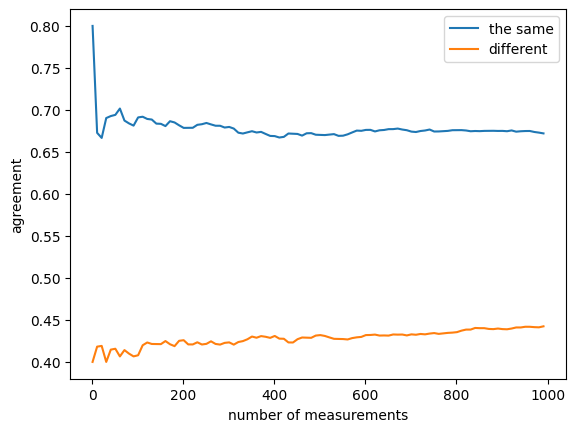

In [14]:
# the same
aggreement = lambda d: numpy.array([
    [a==b for a, b, in zip(line['c1'], line['c1bis'])] for _, line in d.iterrows()]).mean()

x, y = [], []
for i in range(1, 1000, 10):
    x.append(i)
    y.append(aggreement(df.iloc[:i]))

plt.plot(x, y, label='the same')

# different
aggreement = lambda d: numpy.array([
    [a==b for a, b, in zip(line['c1'], line['c2'])] for _, line in d.iterrows()]).mean()

x, y = [], []
for i in range(1, 1000, 10):
    x.append(i)
    y.append(aggreement(df.iloc[:i]))

plt.plot(x, y, label='different')

plt.legend()
plt.xlabel('number of measurements')
plt.ylabel('agreement')

Text(0, 0.5, 'agreement')

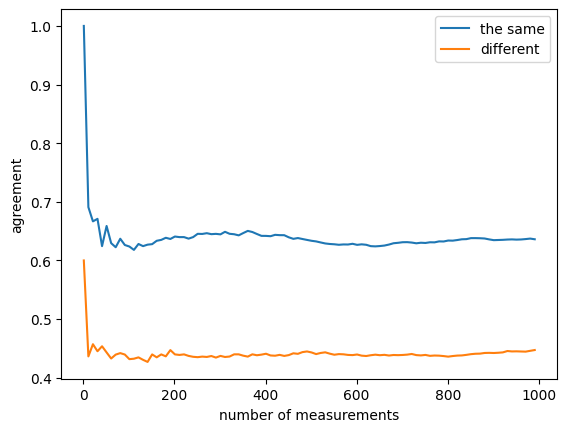

In [15]:
# the same
aggreement = lambda d: numpy.array([
    [a==b for a, b, in zip(line['c2'], line['c2bis'])] for _, line in d.iterrows()]).mean()

x, y = [], []
for i in range(1, 1000, 10):
    x.append(i)
    y.append(aggreement(df.iloc[:i]))

plt.plot(x, y, label='the same')

# different
aggreement = lambda d: numpy.array([
    [a==b for a, b, in zip(line['c1bis'], line['c2bis'])] for _, line in d.iterrows()]).mean()

x, y = [], []
for i in range(1, 1000, 10):
    x.append(i)
    y.append(aggreement(df.iloc[:i]))

plt.plot(x, y, label='different')

plt.legend()
plt.xlabel('number of measurements')
plt.ylabel('agreement')